# Apical Coactivity Analysis
## Notebook for preprocessing and analyzing coactivity spine data from apical FOVs

In [1]:
# Import packages and modules
import os
import numpy as np
from Lab_Analyses.Spine_Analysis_v2.preprocess_spine_data import organize_dual_spine_data
from Lab_Analyses.Spine_Analysis_v2.spine_activity_analysis import spine_activity_analysis
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_analysis import local_coactivity_analysis
from Lab_Analyses.Spine_Analysis_v2.dendritic_coactivity_analysis import dendritic_coactivity_analysis
from Lab_Analyses.Spine_Analysis_v2.spine_volume_normalization import batch_spine_volume_normalization

%matplotlib notebook

## Datasets
Specify the mice the be analyzed and other analysis parameters

In [2]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW150"
id_9 = "JW153"

mouse_list = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8, id_9]

# FOV type
fov_type = "apical"

# Preprocessing parameters
reprocess = False
channels = {"GluSnFr": "GreenCh", "Calcium": "RedCh"}
redetection = True
followup=True
plot_norm=True

# Analysis parameters
activity_window = (-2,4) ## In seconds
zscore = False
volume_norm = True
extend_dendrite = False
cluster_dist = 5
days = ["Early", "Middle", "Late"]
movement_periods = [None, "movement", "nonmovement", "rewarded movement"]
partners = None
save_ind = False
save_grouped = True

## Preprocess data

In [ ]:
# Preprocess and reorganize the imaging datasets
for mouse in mouse_list:
    organize_dual_spine_data(
        mouse,
        channels=channels,
        fov_type=fov_type,
        redetection=redetection,
        reprocess=reprocess,
        save=True,
        followup=followup,
    )
    

# Generate volume normalization constants
if volume_norm:
    for day in days:
        ## GluSnFr data
        batch_spine_volume_normalization(
            mice_list=mouse_list,
            day=day,
            fov_type=fov_type,
            activity_type="GluSnFr",
            zscore=zscore,
            plot=plot_norm
        )
        ## Calcium data
        batch_spine_volume_normalization(
            mice_list=mouse_list,
            day=day,
            fov_type=fov_type,
            activity_type="Calcium",
            zscore=zscore,
            plot=plot_norm
        )

# Data Analysis

### Spine and dendrite activity analysis

In [ ]:
# Perform spine- and dendrite-centric analysis
for day in days:
    spine_activity_analysis(
        mice_list=mouse_list,
        session=day,
        fov_type=fov_type,
        activity_window=activity_window,
        zscore=zscore,
        volume_norm=volume_norm,
        save_ind=save_ind,
        save_grouped=save_grouped
    )

### Local coactivity analysis

In [ ]:
# Perform local coactivity analysis
for day in days:
    for movement in movement_periods:
        local_coactivity_analysis(
            mice_list=mouse_list,
            session=day,
            fov_type=fov_type,
            activity_window=activity_window,
            cluster_dist=cluster_dist,
            zscore=zscore,
            volume_norm=volume_norm,
            partners=partners,
            movement_period=movement,
            save_ind=save_ind,
            save_grouped=save_grouped
        )

### Spine-dendrite coactivity analysis

In [ ]:
# Perform the dendritic coactivity analysis
for day in days:
    for movement in movement_periods:
        dendritic_coactivity_analysis(
            mice_list=mouse_list,
            session=day,
            fov_type=fov_type,
            activity_window=activity_window,
            cluster_dist=cluster_dist,
            zscore=zscore,
            volume_norm=volume_norm,
            partners=partners,
            movement_period=movement_period,
            extend=extend_dendrite,
            save_ind=save_ind,
            save_grouped=save_grouped,
        )

# Visualize analyzed data

In [3]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle
from Lab_Analyses.Spine_Analysis_v2 import spine_activity_plotting as splot

In [4]:
path = r"C:\Users\Jake\Desktop\Analyzed_data\grouped\Dual_Spine_Imaging\Coactivity_Data\Early_apical_dFoF_norm_grouped_spine_activity_data.pickle"

In [5]:
dataset = load_pickle([path])[0]

In [ ]:
splot.plot_basic_features(
    dataset,
    followup_dataset=None,
    exclude="Shaft Spine",
    threshold=0.3,
    figsize=(10, 7),
    hist_bins=25,
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=None,
)

In [ ]:
splot.plot_movement_related_activity(
    dataset,
    followup_dataset=None,
    exclude="Shaft Spine",
    threshold=0.3,
    figsize=(12, 12),
    hist_bins=25,
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=None,
)

In [ ]:
splot.plot_rewarded_movement_related_activity(
    dataset,
    followup_dataset=None,
    exclude="Shaft Spine",
    threshold=0.3,
    figsize=(14, 10),
    hist_bins=25,
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=None,)

In [ ]:
splot.plot_spine_movement_encoding(
    dataset,
    followup_dataset=None,
    exclude="Shaft Spine",
    threshold=0.3,
    figsize=(13, 7),
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    test_method="holm-sidak",
    display_stats=True,
    save=False,
    save_path=None,
)

In [6]:
from Lab_Analyses.Spine_Analysis_v2 import dendrite_activity_plotting as dplot

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\dendrite_activity_plotting.py:154: RuntimeWarning: Mean of empty slice
  mvmt_amplitude[i] = np.nanmean(dendrite_movement_amplitude[spines])
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\dendrite_activity_plotting.py:155: RuntimeWarning: Mean of empty slice
  mvmt_onset[i] = np.nanmean(dendrite_movement_onset[spines])


<IPython.core.display.Javascript object>


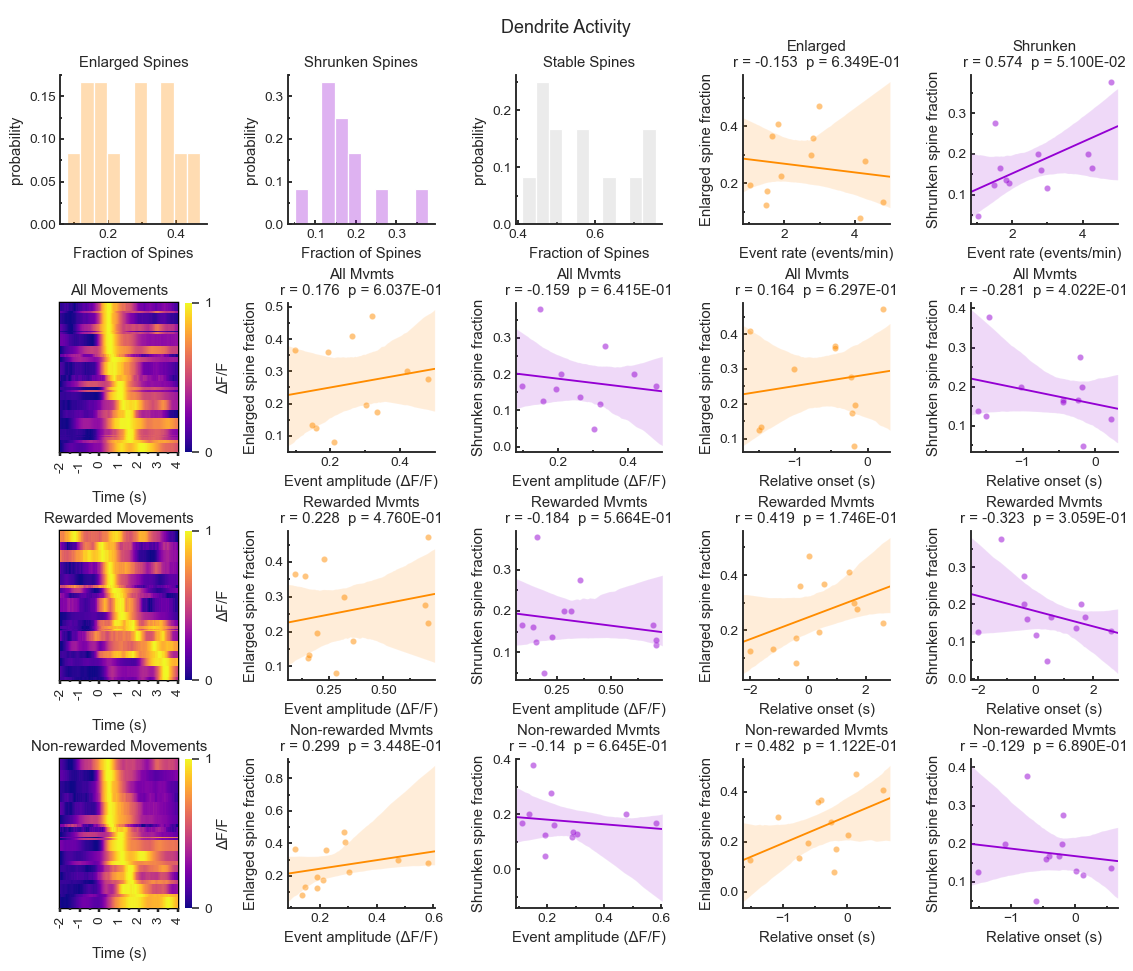

In [7]:
dplot.plot_activity_features(
    dataset,
    followup_dataset=None,
    exclude="Shaft Spine",
    threshold=0.3,
    figsize=(14, 12),
    hist_bins=10,
    save=False,
    save_path=None,
)

<IPython.core.display.Javascript object>


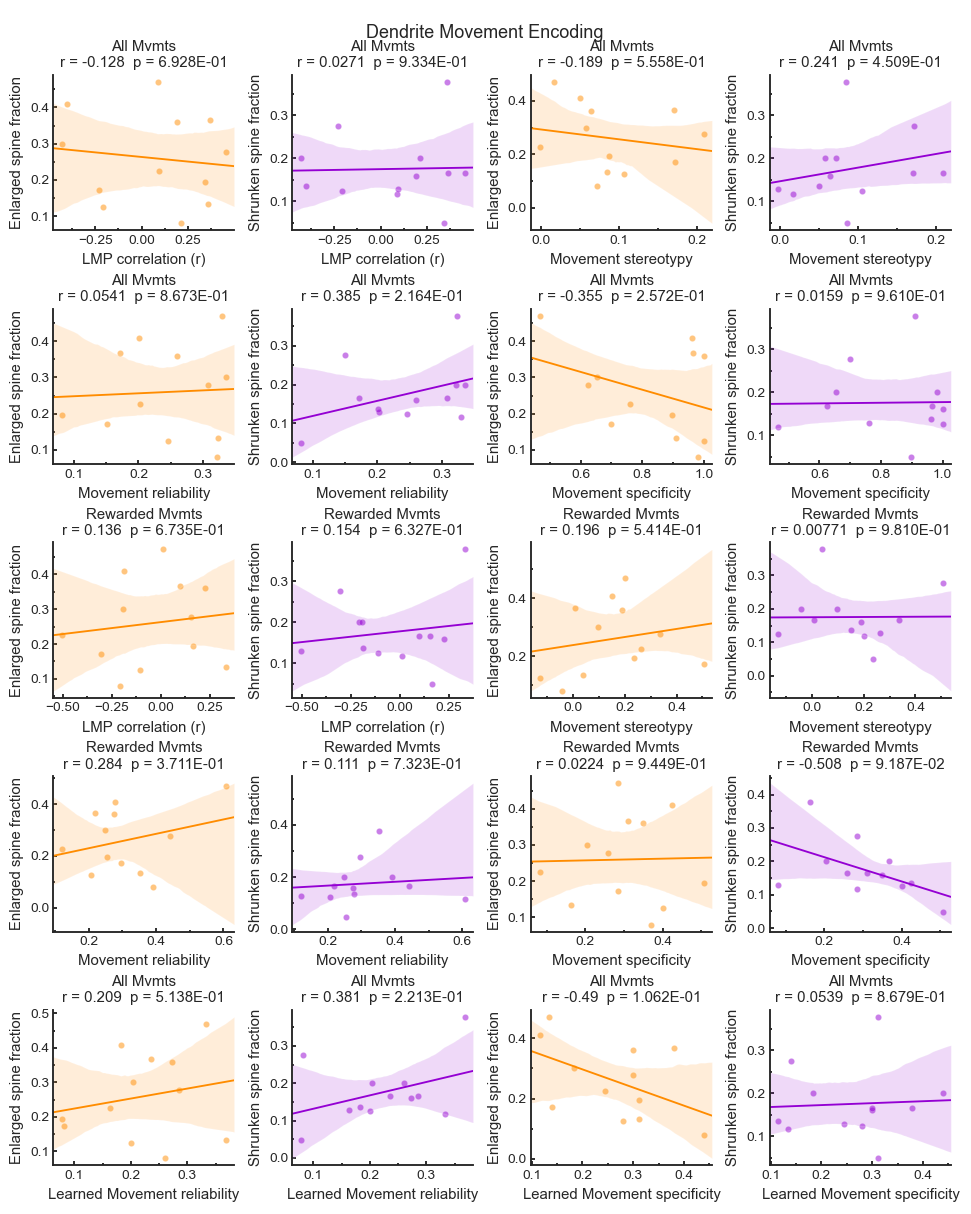

In [9]:
dplot.plot_dendrite_movement_encoding(
    dataset,
    followup_dataset=None,
    exclude="Shaft Spine",
    threshold=0.3,
    figsize=(12, 15),
    save=False,
    save_path=None,
)